<a href="https://colab.research.google.com/github/Sentiment-Analysis-Research-Project/RNN-Implementation/blob/main/Basic_Sentiment_Analysis_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Reference](https://towardsdatascience.com/a-beginners-guide-on-sentiment-analysis-with-rnn-9e100627c02e)

In [1]:
from keras.datasets import imdb

vocabulary size is the total number of unique words

In [2]:
vocab_size = 20000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
print(f'Loaded Dataset with {len(X_train)} training samples and {len(X_test)} testing samples')

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


Loaded Dataset with 25000 training samples and 25000 testing samples


/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Inspect a sample review and its sentiment

In [3]:
print('--------review---------')
print(X_train[0])
print('-------sentiment-------')
print(y_train[0])

--------review---------
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
-------sentiment-------


Maximum and Minimum length of reviews

In [4]:
print(f'Maximum review length - {len(max((X_train + X_test),key=len))}')

Maximum review length - 2697


In [5]:
print(f'Minimum review length - {len(min((X_test),key=len))}')

Minimum review length - 7


In [6]:
print(len(X_train[0]))
print(len(X_test[0]))
print(len(X_train[0] + X_test[0]))

218
68
286


## Pad sequences
In order to feed this data into our RNN, all input documents must have the same length. We will limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0). We can accomplish this using the pad_sequences() function in Keras. For now, set max_words to 500.

In [7]:
from keras_preprocessing import sequence
max_words = 2000
X_train = sequence.pad_sequences(X_train,maxlen=max_words)
X_test = sequence.pad_sequences(X_test,maxlen=max_words)

In [8]:
print(type(X_test))

<class 'numpy.ndarray'>


## Design an RNN model for sentiment analysis

In [9]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_words))
model.add(LSTM(64,dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 32)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 664,897
Trainable params: 664,897
Non-trainable params: 0
_________________________________________________________________
None


## Train and evaluate our model

In [10]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [11]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
history = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/3
390/390 [==============================] - 113s 228ms/step - loss: 0.5420 - accuracy: 0.6960 - val_loss: 0.2664 - val_accuracy: 0.8750
Epoch 2/3
390/390 [==============================] - 89s 228ms/step - loss: 0.2234 - accuracy: 0.9183 - val_loss: 0.2457 - val_accuracy: 0.8906
Epoch 3/3
390/390 [==============================] - 89s 228ms/step - loss: 0.1573 - accuracy: 0.9467 - val_loss: 0.2557 - val_accuracy: 0.9062


## Plot the Model

In [12]:
def plotLearningCurve(history,epochs):
    import matplotlib.pyplot as plt

    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history['accuracy'])
    plt.plot(epoch_range,history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Val'])
    plt.show()

    plt.plot(epoch_range,history['loss'])
    plt.plot(epoch_range,history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train','Val'])
    plt.show()

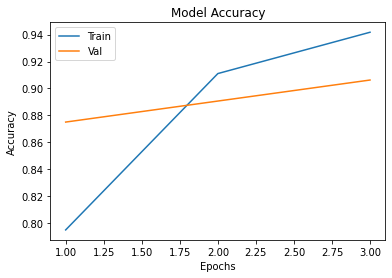

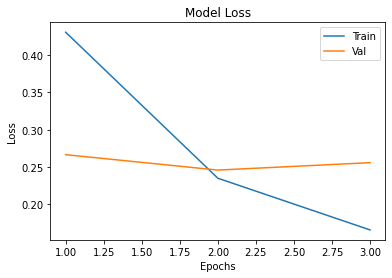

In [13]:
plotLearningCurve(history.history,len(history.epoch))

### Test accuracy

In [14]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8657199740409851
